LACOUX Coline SENE Aminata

# PROJET 3 : ANALYSE DE SEQUENCES GENOMIQUES

## Code & compte rendu

**Note:** Nous ne suivons pas le module 3I019.

#### Imports des packages externes

In [1]:
import utils as ut # fonctions fournies 
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Partie 2 : Préliminaires : données et lecture des fichiers

### Lecture des séquences fournies

#### Séquences PHO :

In [4]:
seqs_PHO = ut.read_fasta("sequences/regulatory_seq_PHO.fasta")

# Affichage des clés-valeurs
keys = seqs_PHO.keys()
for key in keys :
    print("Clé : ", key)
    print("Valeur : ", seqs_PHO[key])
    print("\n")

NameError: name 'ut' is not defined

#### Séquences GAL :

In [3]:
seqs_GAL = ut.read_fasta("sequences/regulatory_seqs_GAL.fasta")

# Affichage des clés-valeurs
keys = seqs_GAL.keys()
for key in keys :
    print("Clé : ", key)
    print("Valeur : ", seqs_GAL[key])
    print("\n")

Clé :  >GAL1	GAL1; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001134.7:278221:279020:D

Valeur :  [1, 0, 2, 2, 3, 3, 0, 3, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 3, 1, 0, 3, 0, 3, 1, 1, 0, 3, 3, 1, 3, 1, 0, 0, 3, 3, 0, 2, 1, 3, 1, 3, 0, 1, 1, 0, 1, 0, 2, 3, 2, 3, 2, 3, 2, 0, 0, 1, 1, 0, 0, 3, 2, 3, 0, 3, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 3, 2, 3, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 3, 3, 3, 3, 0, 2, 0, 0, 2, 3, 0, 1, 3, 3, 3, 1, 0, 1, 3, 3, 3, 2, 3, 0, 0, 1, 3, 2, 0, 2, 1, 3, 2, 3, 1, 0, 3, 3, 3, 0, 3, 0, 3, 3, 2, 0, 0, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 3, 3, 1, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 3, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 3, 3, 3, 0, 0, 3, 0, 0, 3, 1, 0, 3, 0, 3, 3, 0, 1, 0, 3, 2, 2, 1, 0, 3, 3, 0, 1, 1, 0, 1, 1, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 1, 1, 0, 3, 0, 3, 1, 3, 0, 0, 3, 1, 3, 3, 0, 1, 3, 3, 0, 3, 0, 3, 2, 3, 3, 2, 3, 2, 2, 0, 0, 0, 3, 2, 3, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 3, 3, 0, 3, 1, 3, 3, 0, 2, 1, 1, 3,

#### Séquences MET :

In [4]:
seqs_MET = ut.read_fasta("sequences/regulatory_seqs_MET.fasta")

# Affichage des clés-valeurs
keys = seqs_MET.keys()
for key in keys :
    print("Clé : ", key)
    print("Valeur : ", seqs_MET[key])
    print("\n")

Clé :  >MET1	MET1; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001143.7:570454:571253:D

Valeur :  [2, 3, 3, 0, 2, 1, 2, 3, 0, 0, 0, 3, 0, 0, 3, 3, 1, 3, 2, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 0, 2, 0, 3, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 0, 3, 2, 2, 1, 1, 3, 3, 1, 0, 0, 0, 2, 0, 1, 1, 3, 1, 2, 0, 3, 3, 2, 1, 2, 3, 2, 2, 3, 0, 2, 0, 0, 0, 1, 1, 0, 3, 3, 3, 3, 3, 2, 0, 1, 1, 1, 0, 2, 3, 3, 3, 3, 2, 2, 3, 3, 0, 3, 1, 0, 0, 3, 2, 0, 0, 1, 0, 1, 3, 3, 2, 0, 0, 2, 1, 3, 3, 3, 0, 1, 3, 1, 3, 2, 1, 0, 3, 3, 1, 1, 1, 0, 3, 1, 3, 1, 3, 0, 3, 0, 2, 1, 3, 0, 3, 2, 2, 2, 3, 0, 0, 3, 1, 0, 1, 0, 2, 1, 3, 0, 1, 2, 0, 3, 1, 0, 1, 3, 3, 0, 1, 3, 1, 3, 2, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 2, 3, 3, 1, 0, 0, 3, 2, 3, 3, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 3, 0, 0, 1, 0, 3, 2, 3, 0, 0, 1, 0, 1, 3, 3, 3, 1, 0, 2, 2, 3, 3, 2, 2, 1, 1, 3, 3, 0, 1, 1, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 0, 2, 3, 3, 3, 1, 2, 1, 0, 0,

#### Séquence du Saccharomyces Cerevisiae :

In [5]:
seq_s_cerevisae = ut.read_fasta("sequences/yeast_s_cerevisae_genomic_chr1-4.fna")

### Question 2.1

In [6]:
liste_entiers = list(seq_s_cerevisae.values())[0]
print("Liste des occurences de nucléotides : ", ut.nucleotide_count(liste_entiers))
somme = sum(liste_entiers)
print("Nombre total de nucléotides : ", somme)

Liste des occurences de nucléotides :  [59043, 41019, 41611, 58814]
Nombre total de nucléotides :  300683


Les chromosomes de s-cerevisiae contiennent :
- 59 043 nucléotides A
- 41 019 nucléotides C
- 41 611 nucléotides G
- 58 814 nucléotides T

Soit au total 300 683 nucléotides.

### Question 2.2

In [7]:
liste_probas = ut.nucleotide_frequency(liste_entiers)
print(liste_probas)

[0.2944979  0.20459681 0.20754962 0.29335568]


Estimation des fréquences des lettres sur le génome de S. cerevisae :
- Fréquence de A : 0.2944979
- Fréquence de C : 0.20459681
- Fréquence de G : 0.20754962
- Fréquence de T : 0.29335568

### Question 2.3

In [8]:
def logproba(liste_entiers, m):
    """
        Calcule la log-probabilité d'une séquence étant donné :
        - liste_entiers : liste des lettres
        - m : fréquence des lettres
    """
    res = 0
    for nucl in liste_entiers:
        res += math.log(m[nucl])
    return res

In [9]:
# Test simple
logproba([1, 0, 3], [0.2, 0.3, 0.1, 0.4])

-3.7297014486341915

### Question 2.4

In [10]:
def logprobafast(nucleotide_count, m):
    """
        Calcule la log-probabilité d'une séquence étant donné :
        - nucleotide_count : occurrences des quatre lettres dans une liste d’entiers
        - m : fréquence des lettres
    """
    res = 0
    for nucl in range(len(nucleotide_count)):
        nb_nucl = nucleotide_count[nucl]
        res += math.log(m[nucl]) * nb_nucl
    return res

In [11]:
# Test simple
logprobafast([1,1,0,1], [0.2, 0.3, 0.1, 0.4])

-3.7297014486341915

# Partie 3 : Annotation des régions promoteurs

## 3.1 : Description Empirique, préliminaires

### Question 3.1.1

#### a)

In [12]:
def code(m, k):
    """
        Renvoie pour un mot m de taille k son indice dans le tableau ordonné lexicographiquement
    """
    res = 0
    for i in  range(k):
        lettre = m[k-i-1]
        val = ut.nucleotide_indetermine[lettre]
        res +=  val * 4**i
    return res

In [13]:
# Test simple
code("TAC", 3)

49

#### b)

In [14]:
def inverse(i, k):
    """
        Renvoie la séquence de longeur k connaissant son indice i dans le tableau ordonné lexicographiquement
    """
    m = ""
    vals = ['A', 'C', 'G', 'T', 'N'] # définition des nucléotides
    for a in range(0, k):
        val = (i % (4 ** (a+1))) // (4 ** a)
        lettre = vals[val]
        m = lettre + m
    return m           

In [15]:
# Test simple
inverse(49, 3)

'TAC'

#### c)

In [16]:
def compte_occurences(seq, k):
    """
        Compte le nombre d'occurences pour tous les mots de taille k dans une séquence d'ADN
        en comptant les occurences chevauchantes
        - seq : séquence d'ADN sous forme d'une string
        - k : taille des mots
    """
    dict_mots = dict()
    for i in range(4**k):
        mot = inverse(i, k)
        dict_mots[mot] = 0
    keys = dict_mots.keys()
    for i in range(len(seq)-k+1):
        mot = seq[i : i+k]
        if mot in keys:
            dict_mots[mot] = dict_mots[mot] + 1
    return dict_mots

In [17]:
# Teste simple
compte_occurences("ATCAT", 2)

{'AA': 0,
 'AC': 0,
 'AG': 0,
 'AT': 2,
 'CA': 1,
 'CC': 0,
 'CG': 0,
 'CT': 0,
 'GA': 0,
 'GC': 0,
 'GG': 0,
 'GT': 0,
 'TA': 0,
 'TC': 1,
 'TG': 0,
 'TT': 0}

### Question 3.1.2

Si on connait les fréquences des lettres dans le génome, et qu'on considère que les lettres apparaissent successivement et de manière aléatoire, alors le nombre attendu d'occurences pour un mot $w$ dans une séquence de longueur $l$ est :

$$ nb_{occ} = (l-k+1) \times \prod_{n \in w}f(n)$$ 

Avec $k$ la taille du mot et $f(n)$ la fréquence de la lettre $n$.

In [18]:
def comptage_attendu(freq, k, l):
    """
        Revoie les comptages attendus pour tous les mots de longueur k
        - freq : fréquence des nucléotides
        - k : taille des mots
        - l : longueur du génome
    """
    dict_mots = dict()
    
    for i in range(4**k):
        
        mot = inverse(i, k) 
        
        # Conversion du mot en liste d'entier
        liste_entiers = []
        for n in mot :
            liste_entiers.append(ut.nucleotide_indetermine[n])
            
        fmot = math.e ** logprobafast(ut.nucleotide_count(liste_entiers), freq)
        dict_mots[mot] = int((l-k+1) * fmot)
        
    return dict_mots

In [19]:
# Test simple
comptage_attendu([0.5, 0.2, 0.4, 0.3], 1, 100)

{'A': 50, 'C': 20, 'G': 40, 'T': 30}

In [20]:
# Test simple
comptage_attendu([0.5, 0.2, 0.4, 0.3], 2, 100)

{'AA': 24,
 'AC': 9,
 'AG': 19,
 'AT': 14,
 'CA': 9,
 'CC': 3,
 'CG': 7,
 'CT': 5,
 'GA': 19,
 'GC': 7,
 'GG': 15,
 'GT': 11,
 'TA': 14,
 'TC': 5,
 'TG': 11,
 'TT': 8}

### Question 3.1.3

In [81]:
def trace_graphique2D_occurences(seq, k):
    """
        Affiche avec un graphique 2D  :
           le nombre attendu d’occurrences 
           le nombre observé  
       - seq : séquence sous forme d'une liste d'entiers
       - k : longueurs des mots à observer
   """ 
    
    seq_string = ut.decode_sequence(seq)
    
    freq = ut.nucleotide_frequency(seq)
    l = len(seq)
    print("taille de la séquence : ", l, " nucléotides", sep="")
    
    attendu = list(comptage_attendu(freq, k, l).values())
    observe = list(compte_occurences(seq_string, k).values())
    x = [i for i in range(4**k)]
    
    observe_attendu = [observe[i]-attendu[i] for i in x]

    
    plt.plot(x, observe_attendu, label = "Observations - Résultat attendu") 
    plt.plot(x, [0 for i in x], label= "y=0")
    plt.legend(loc="best")
    plt.ylabel("Nombre d'occurences")
    plt.xlabel("indice du mot")
    plt.title("Etude du nombre d'occurence des mots")
    plt.grid()
    plt.show()

#### Préparation des séquences

Afin de simplifier l'analyse et de pouvoir utiliser notre fonction  ci-dessus, nous devons concaténer l'ensemble des séquences de chaque fichier sous forme d'une liste d'entier.

In [2]:
def concatene_sequence(seq):
    """
        Concatène un ensemble de séquences sous forme d'une liste d'entiers
        - seq : dictionnaire des séquences à concaténer
    """
    liste_entiers = []
    for key in seq.keys():
        liste_entiers.extend(seq[key])
    return liste_entiers

In [3]:
seq_PHO_list = concatene_sequence(seqs_PHO)
seq_GAL_list = concatene_sequence(seqs_GAL)
seq_MET_list = concatene_sequence(seqs_MET)
seq_s_cerevisae_list = concatene_sequence(seq_s_cerevisae)

NameError: name 'seqs_PHO' is not defined

#### Analyse PHO

taille de la séquence : 4000 nucléotides


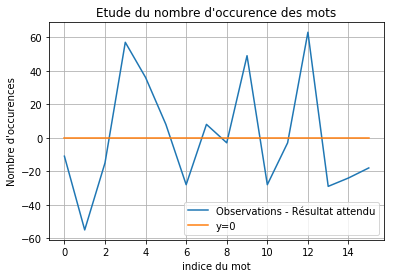

In [82]:
trace_graphique2D_occurences(seq_PHO_list, 2)

taille de la séquence : 4000 nucléotides


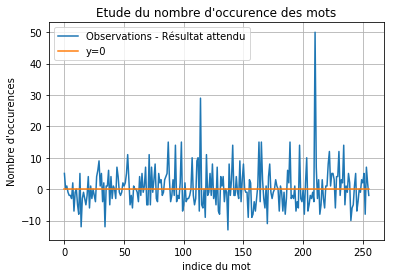

In [83]:
trace_graphique2D_occurences(seq_PHO_list, 4)

taille de la séquence : 4000 nucléotides


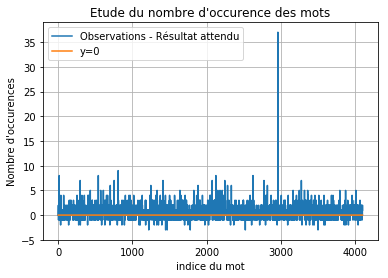

In [84]:
trace_graphique2D_occurences(seq_PHO_list, 6)

taille de la séquence : 4000 nucléotides


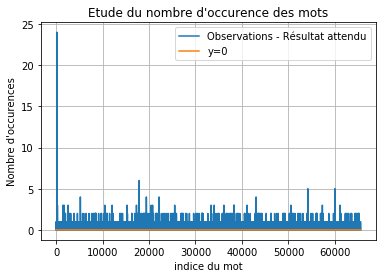

In [85]:
trace_graphique2D_occurences(seq_PHO_list, 8)

Observations :

#### Analyse GAL

taille de la séquence : 5612 nucléotides


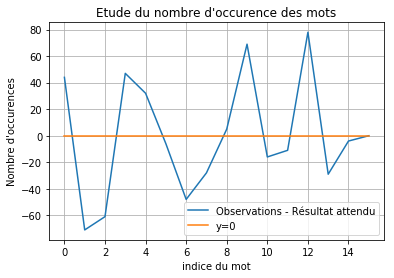

In [86]:
trace_graphique2D_occurences(seq_GAL_list, 2)

taille de la séquence : 5612 nucléotides


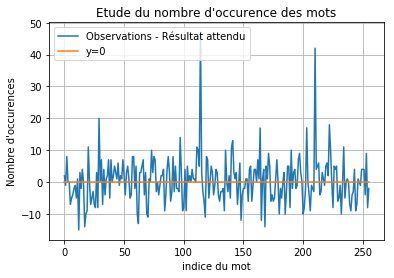

In [87]:
trace_graphique2D_occurences(seq_GAL_list, 4)

taille de la séquence : 5612 nucléotides


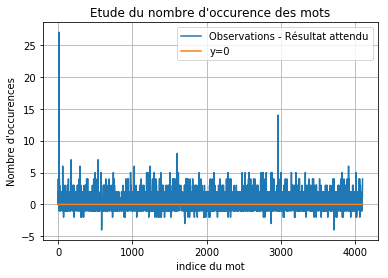

In [88]:
trace_graphique2D_occurences(seq_GAL_list, 6)

taille de la séquence : 5612 nucléotides


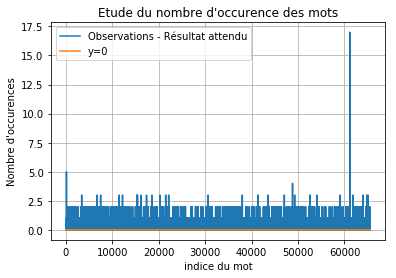

In [89]:
trace_graphique2D_occurences(seq_GAL_list, 8)

Observations :

#### Analyse MET

taille de la séquence : 7200 nucléotides


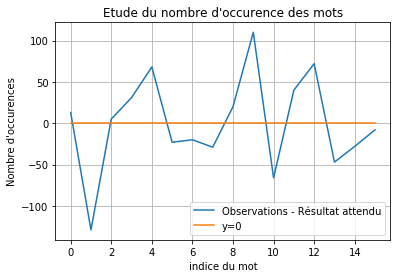

In [90]:
trace_graphique2D_occurences(seq_MET_list, 2)

taille de la séquence : 7200 nucléotides


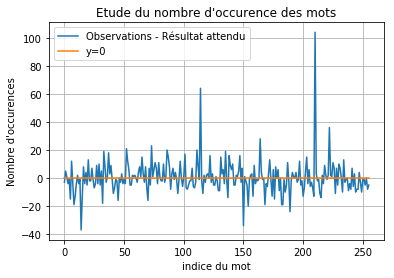

In [91]:
trace_graphique2D_occurences(seq_MET_list, 4)

taille de la séquence : 7200 nucléotides


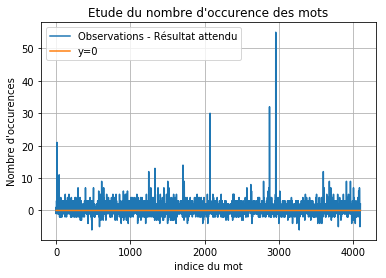

In [92]:
trace_graphique2D_occurences(seq_MET_list, 6)

taille de la séquence : 7200 nucléotides


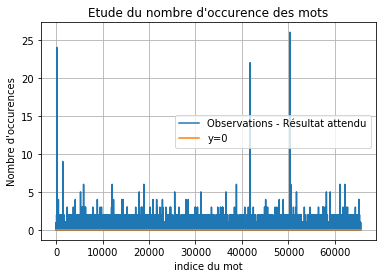

In [93]:
trace_graphique2D_occurences(seq_MET_list, 8)

Observations :

## 3.2 : Simulation de séquences aléatoires

### Question 3.2.1

In [36]:
def simule_sequence(lg, m):
    """ 
        Génère une séquence aléatoire de longueur lg d'une composition donnée m
        - lg : longueur
        - m : composition (proportion de A, C, G, T)
    """
    sequence = []
    for i in range(lg):
        sequence.append((np.random.choice([0, 1, 2, 3], p=m)))
    return list(sequence)

In [37]:
simule_sequence(5, [0.25, 0.25, 0.25, 0.25])

[1, 0, 0, 2, 2]

### Question 3.2.2

taille de la séquence : 5000 nucléotides


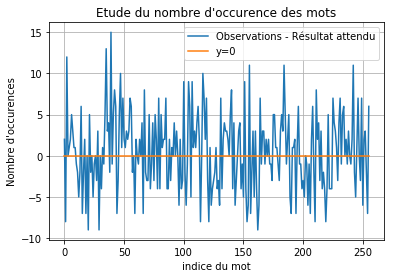

In [94]:
seq_alea = simule_sequence(5000, [0.25, 0.25, 0.25, 0.25])
trace_graphique2D_occurences(seq_alea, 4)

On remarque que la différence entre le nombre d'occurence observé est faible par rapport au résultat attendu. En effet, on a au maximum 6 occurences d'écart alors qu'il y a 250 mots différents et que la séquence compte 500 nucluéotides, ce qui fait 4^5000 mots de taille 4 possibles. On peut donc supposer que nos caluls sont valides.

### Question 3.2.3

In [41]:
def estime_proba_mot(mot, n, lg, m):
    """
        Estime la probabilité empirique d'observer un mot un nombre n de fois 
        dans une séquence de longueur l de distribution m
    """
    nb_obs = 0 # nombre de fois où on observe le mot au moins n fois
    nb_simulations = 100 # Nombre de simulations à effectuer
    for i in range(nb_simulations):
        sequence = simule_sequence(lg, m)
        nb_mot = compte_occurences(ut.decode_sequence(sequence), len(mot))[mot]
        if (nb_mot) >= n:
            nb_obs += 1
    return nb_obs/nb_simulations

In [42]:
estime_proba_mot("ATCTGC", 5, 10000, [0.25, 0.25, 0.25, 0.25])

0.16

In [43]:
estime_proba_mot("TTTAAA", 5, 10000, [0.25, 0.25, 0.25, 0.25])

0.07

In [68]:
estime_proba_mot("AAAAAA", 5, 10000, [0.7, 0.1, 0.1, 0.1])

1.0

### Question 3.2.4

In [69]:
def histograme_comptage_mot(mot, lg, m):
    """
        Dresse l'histogramme de la distribution du comptage du mot donné
        sur chaine de taille lg et pour une composition m
    """
    comptages = []
    nb_simulations = 500 # Nombre de simulations à effectuer
    for i in range(nb_simulations):
        sequence = simule_sequence(lg, m)
        nb_mot = compte_occurences(ut.decode_sequence(sequence), len(mot))[mot]
        comptages.append(nb_mot)
    
    plt.hist(comptages, range=(0, max(comptages)), bins=10)
    plt.show()

In [95]:
histograme_comptage_mot('ATATAT', 5000, [0.25, 0.25, 0.25, 0.25])

KeyboardInterrupt: 

In [ ]:
histograme_comptage_mot('TTTAAA', 5000, [0.25, 0.25, 0.25, 0.25])

Remarques :

### Question 3.2.5

Réponse :

## 3.2 : Simulation de séquences aléatoires

### Question 3.3.1